Importing Libraries






In [1]:
# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for data preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder

# for imputing missing values
from sklearn.impute import SimpleImputer,KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# for machine learning
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor ,AdaBoostClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier

# for classification evaluation metrices
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,precision_score,mean_squared_error,r2_score

# to perform statistical test
from sklearn.feature_selection import chi2 # for categorical fetures
from sklearn.feature_selection import f_classif # for numerical features (Anova f-test)

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Let's see a detailed information about this dataset's Features

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Shape of this dataset**

In [5]:
print(f"This dataframe has {data.shape[0]} rows and {data.shape[1]} columns.")

This dataframe has 920 rows and 16 columns.


# **Exploring age of the patient in years feature**

In [6]:
print(f"The minimum age in age column is {data['age'].min()} and maximum age is {data['age'].max()}.")

The minimum age in age column is 28 and maximum age is 77.


**Let's see visual representation of age column**

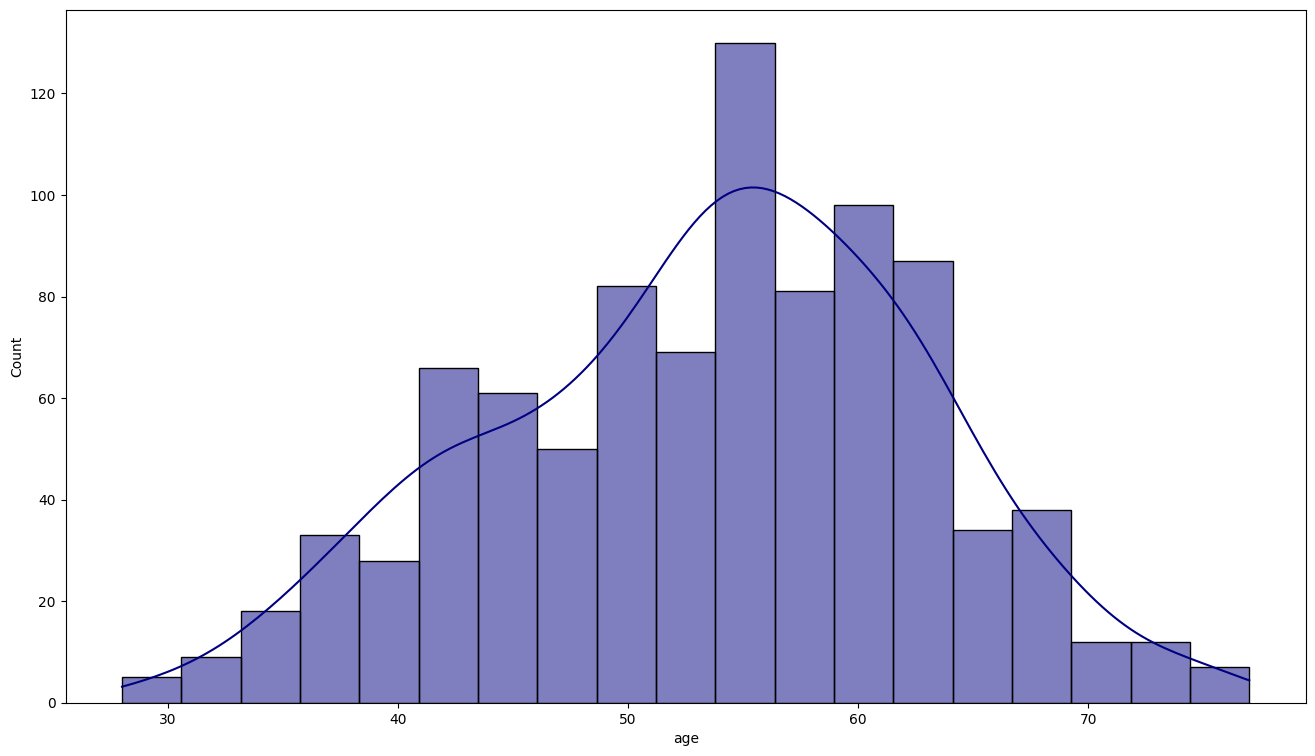

In [7]:
plt.figure(figsize=(16, 9))
sns.histplot(data["age"], kde=True, color="Navy")
plt.show()

Mean: 53.51086956521739
Median: 54.0
Mode: 54


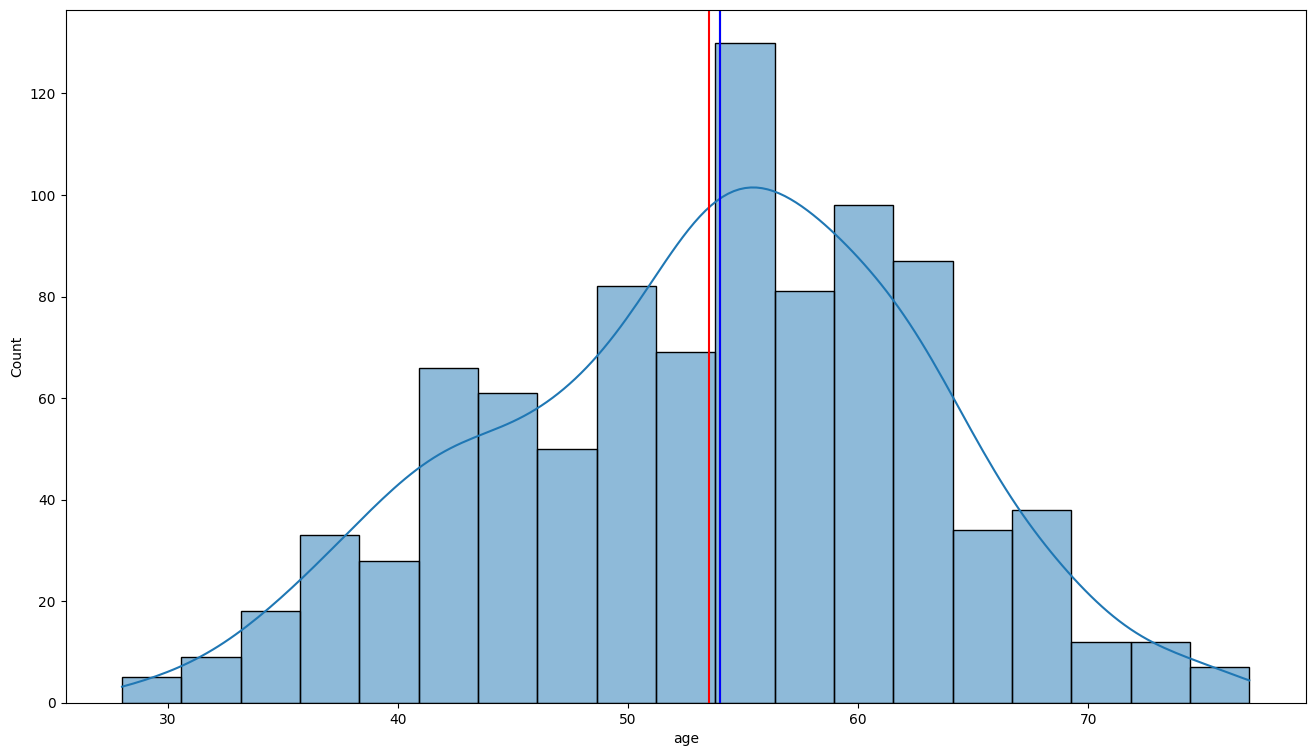

In [8]:
# Set the figure size to 16:9
plt.figure(figsize=(16, 9))
# Plot the mean, median and mode of each column using sns
sns.histplot(data["age"], kde=True)
plt.axvline(data["age"].mean(), color="r")
plt.axvline(data["age"].median(), color="g")
plt.axvline(data["age"].mode()[0], color="b")

# Print the mean, median and mode of each column
print("Mean:", data["age"].mean())
print("Median:", data["age"].median())
print("Mode:", data["age"].mode()[0])

***Exploring sex(Male/Female)feature ***

In [9]:
data["sex"].value_counts()

,count
sex,
Male,726
Female,194


**Calculate Percentage of Males and Females in sex column**

In [10]:
# calculate percentage of male and female in sex column
male = 726
female = 194
total = male + female

# calculate percentage
male_percentage = (male/total) * 100
female_percentage = (female/total) * 100

# print the result
print(f"Male Percentage in data: {male_percentage:.2f}%")
print(f"Female Percentage in data: {female_percentage:.2f}%")

# difference
difference_peercentage = ((male - female)/ female) * 100
print(f"Males are {difference_peercentage:.2f}% more than females in the data.")

Male Percentage in data: 78.91%
Female Percentage in data: 21.09%
Males are 274.23% more than females in the data.


**Visualizing Distribution of sex in Dataset**

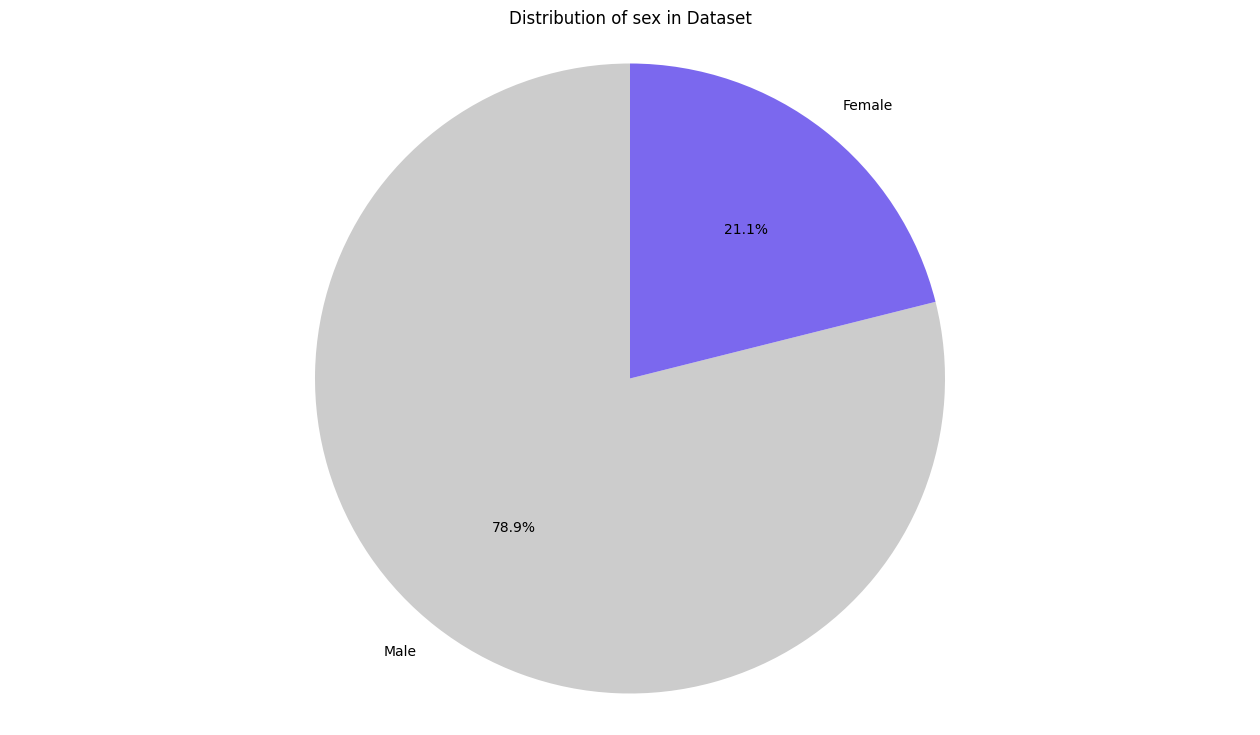

In [11]:
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['#CCCCCC','MediumSlateBlue']

fig1, ax1 = plt.subplots(figsize=(16, 9))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of sex in Dataset')
plt.show()

In [12]:
print("Unique values count in dataset column:",data["dataset"].value_counts())

Unique values count in dataset column: dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


**Visualize dataset column**

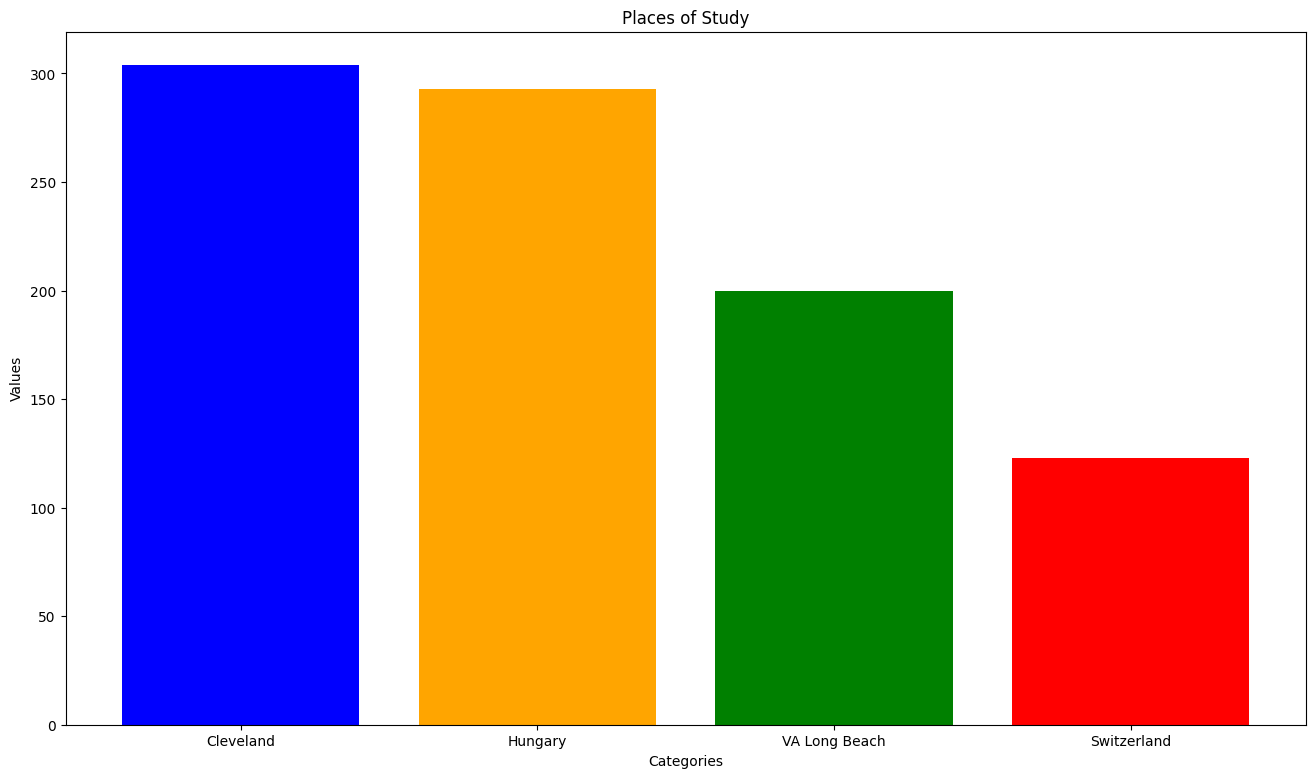

In [13]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding values
categories = ['Cleveland', 'Hungary', 'VA Long Beach', 'Switzerland']
values = [304, 293, 200, 123]
colors = ['blue', 'orange', 'green', 'red']

# Create a bar plot
plt.figure(figsize=(16, 9))
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Places of Study')
plt.show()

**Print the values count of the dataset column grouped by sex**

In [14]:
print(data.groupby("sex")["dataset"].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [15]:
# let's check value count of cp column
print("Value count of cp column:",data["cp"].value_counts())

Value count of cp column: cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


**Lets visualize cp on basis of dataset**

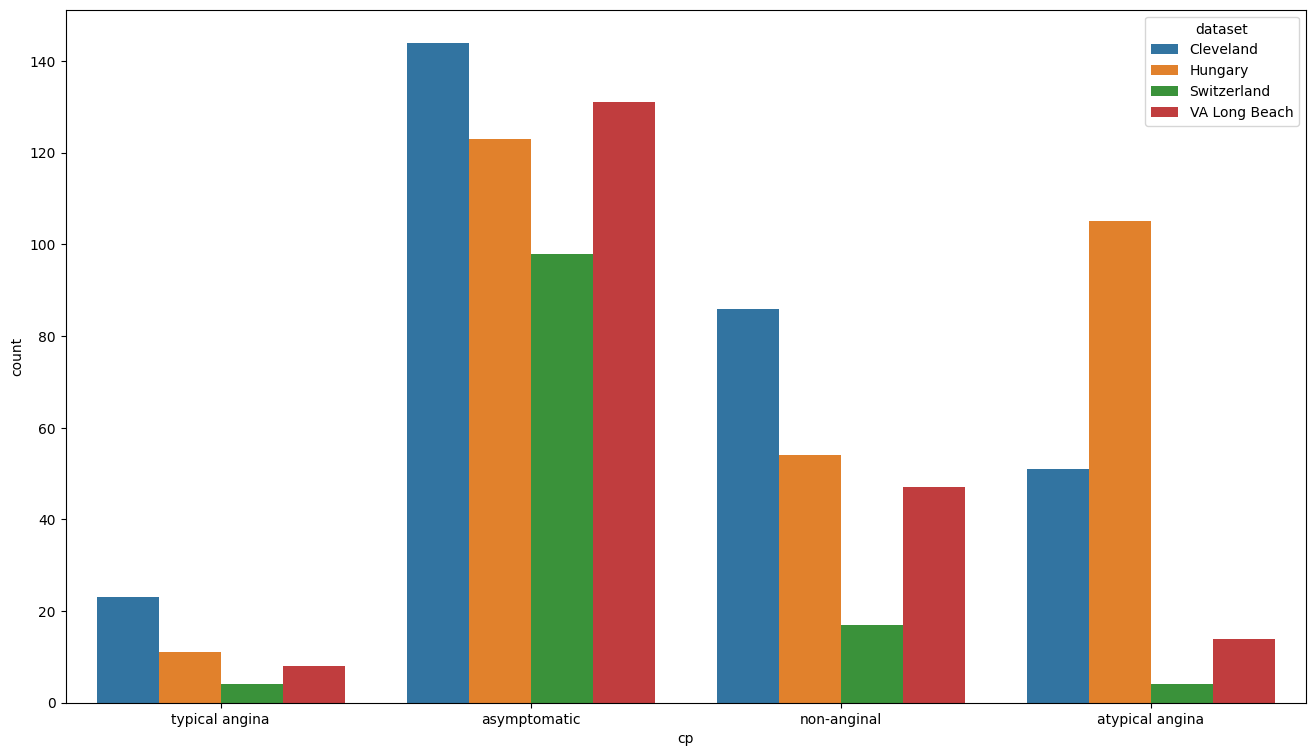

In [16]:
# Set the figure size
plt.figure(figsize=(16, 9))

# Create the count plot
sns.countplot(data=data, x="cp", hue="dataset")
plt.show()

**Let's visualize age on basis of c**

In [17]:
# draw the plot of age column grouped by cp column using plotly
fig_3 = px.histogram(data_frame=data,x="age",color="cp")
fig_3.show()

**Exploring trestbps resting blood pressure in (mm Ng on admission to the hospital)**

In [18]:
data["trestbps"].describe()

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


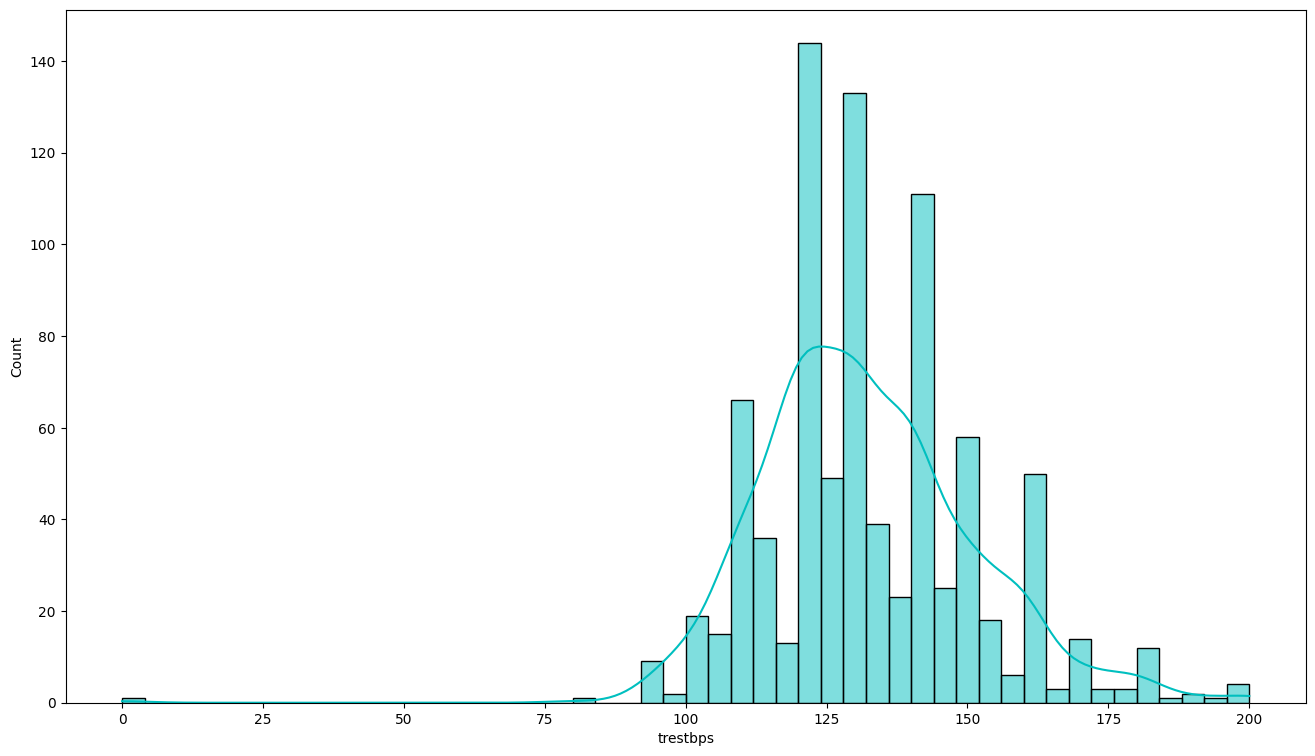

In [19]:
plt.figure(figsize=(16, 9))
sns.histplot(data=data, x="trestbps", kde=True, bins=50, color='c')
plt.show()

**Exploring Chol serum cholesterol I'm MG/DL**

In [20]:
data["chol"].value_counts()

,count
chol,
0.0,172
220.0,10
254.0,10
204.0,9
219.0,9
...,...
165.0,1
337.0,1
333.0,1


In [21]:
data["chol"].describe()

,chol
count,890.000000
mean,199.130337
std,110.780810
min,0.000000
25%,175.000000
50%,223.000000
75%,268.000000
max,603.000000


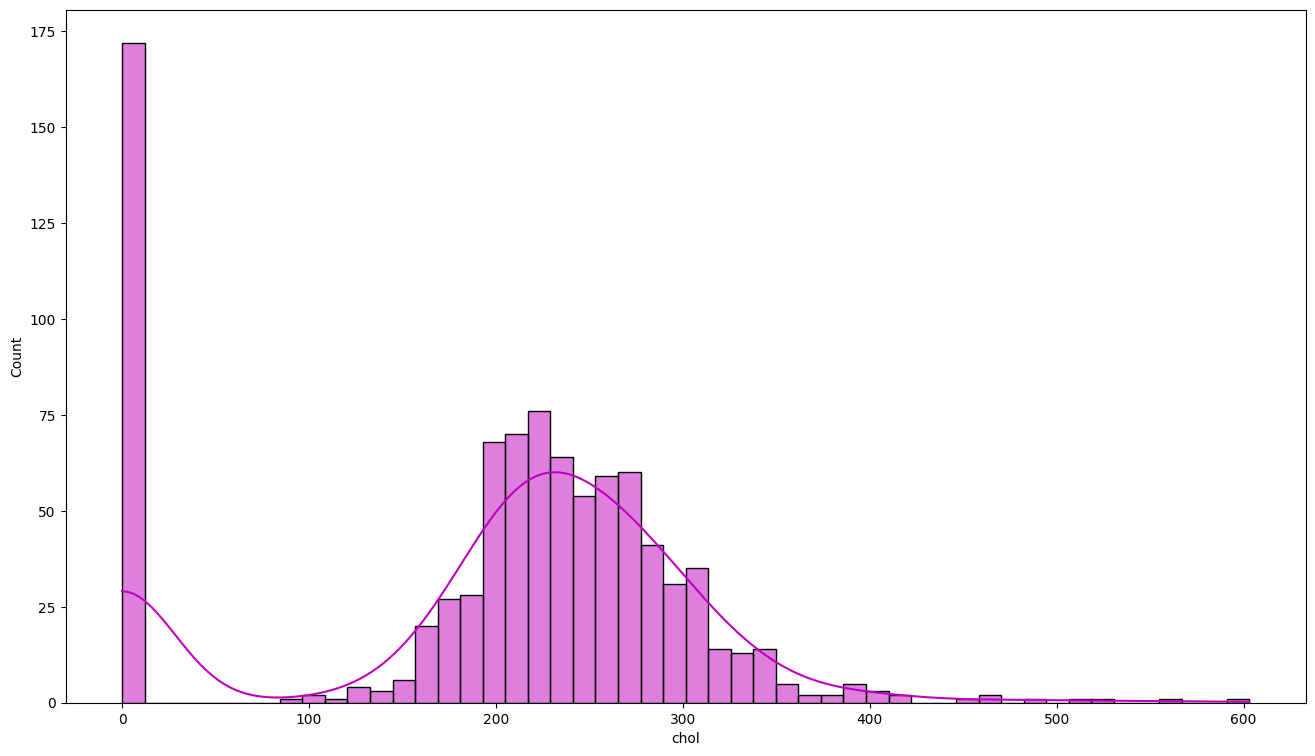

In [22]:
plt.figure(figsize=(16, 9))
# Create a histplot of the chol column with a KDE overlay
sns.histplot(data=data, x="chol", kde=True, bins=50, color='m')
plt.show()

**Exploring fbs if fasting blood sugar>120 mg/DL(true/false)**

In [23]:
data["fbs"].value_counts()

,count
fbs,
False,692
True,138


# **Visualize fbs**

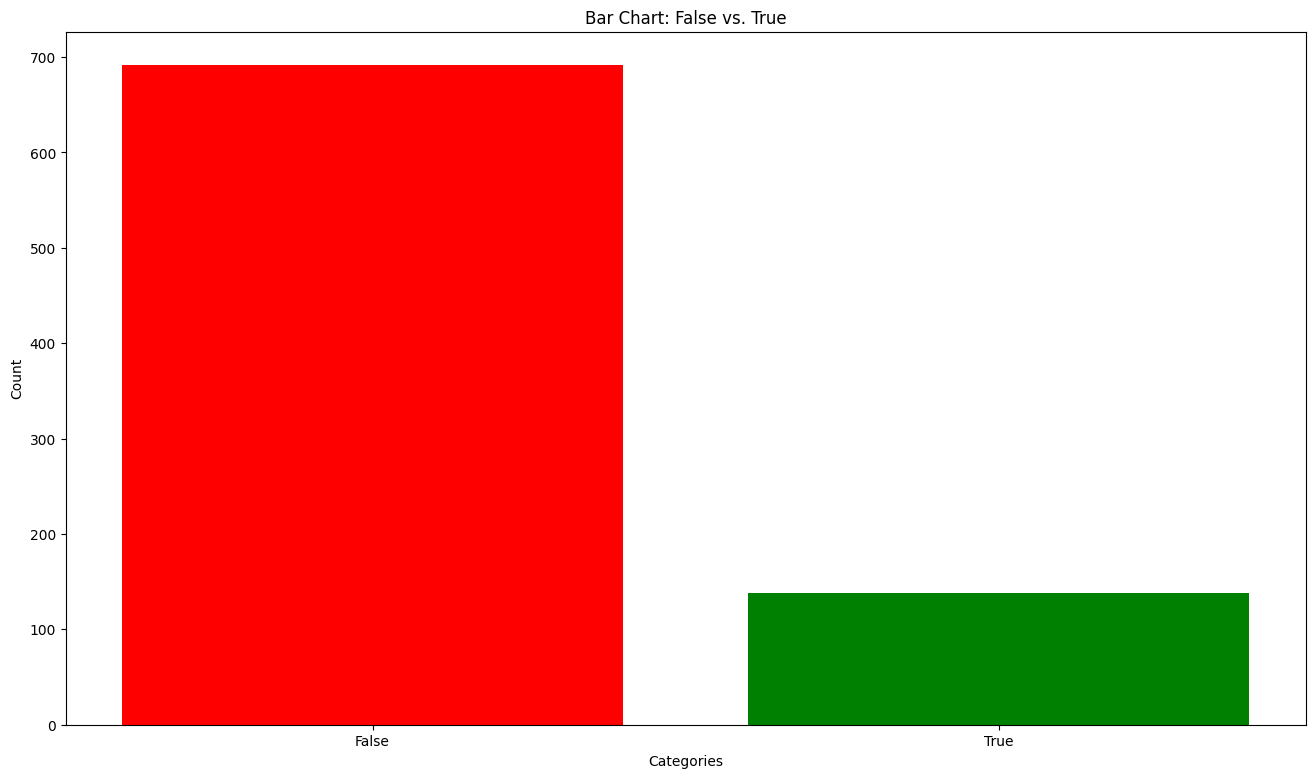

In [24]:
categories = ['False', 'True']
counts = [692, 138]

# Create a bar chart
plt.figure(figsize=(16, 9))  # Set the plot size
plt.bar(categories, counts, color=['red', 'green'])  # Different colors for True and False
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart: False vs. True')
plt.show()

Exploring restecg Resting electrocardiographic
**bold text**
1.   List item

1.   List item
2.   List item


2.   List item

results (Values: normal, stt abnormality, lv hypertrophy)

In [26]:
data["restecg"].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


Let's Visualize restecg

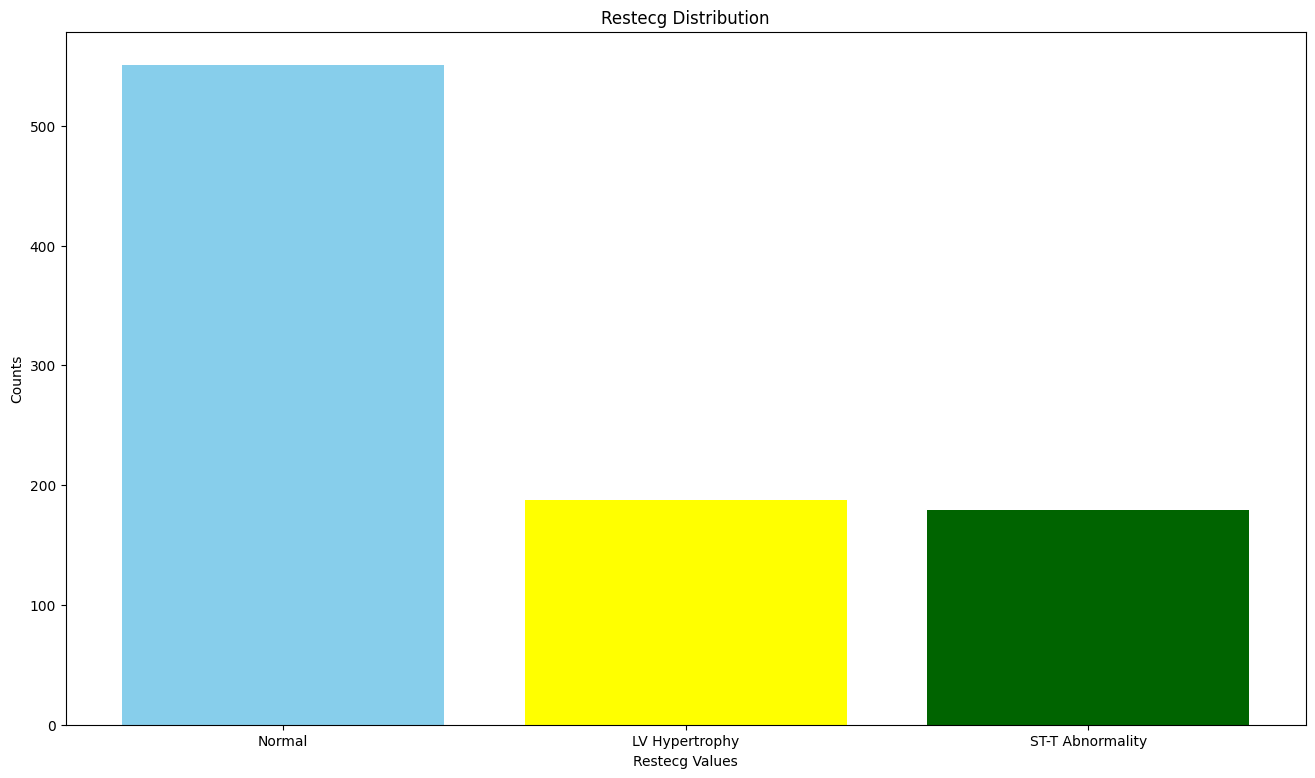

In [27]:
import matplotlib.pyplot as plt

values = ["Normal", "LV Hypertrophy", "ST-T Abnormality"]
counts = [551, 188, 179]

# Custom colors for bars
colors = ["skyblue", "yellow", "darkgreen"]

# Create the bar chart
plt.figure(figsize=(16, 9))
plt.bar(values, counts, color=colors)
plt.xlabel("Restecg Values")
plt.ylabel("Counts")
plt.title("Restecg Distribution")
plt.show()

Exploring thalch Maximum heart rate achieved

In [28]:
data["thalch"].value_counts()

,count
thalch,
150.0,43
140.0,41
120.0,35
130.0,30
160.0,26
...,...
63.0,1
67.0,1
107.0,1


In [29]:
data["thalch"].describe()

,thalch
count,865.000000
mean,137.545665
std,25.926276
min,60.000000
25%,120.000000
50%,140.000000
75%,157.000000
max,202.000000


Let's Visualize thalch

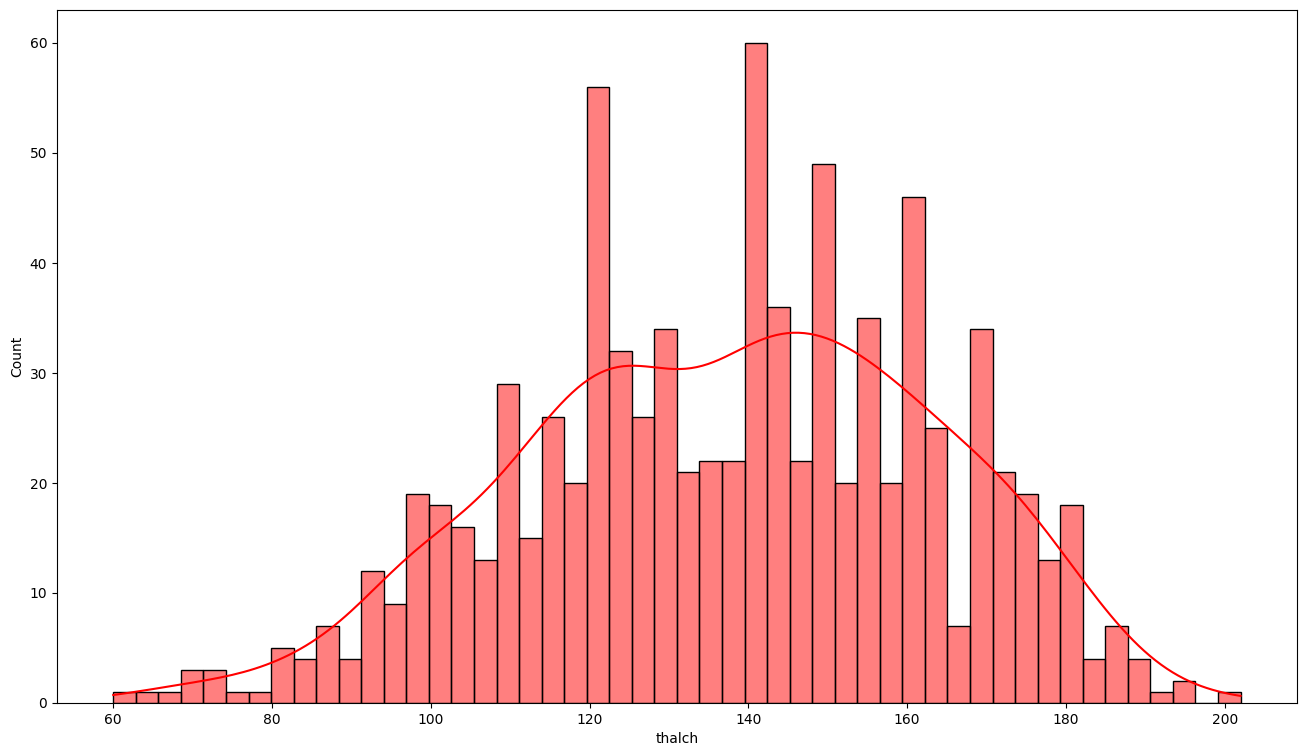

In [30]:
# Set the figure size to 16x9
plt.figure(figsize=(16, 9))

# Create a histplot of the thalch column with a KDE overlay
sns.histplot(data=data, x="thalch", kde=True, bins=50, color='r')

# Display the plot
plt.show()

Exploring exang Exercise-induced angina (True/ False)

In [31]:
data["exang"].value_counts()

,count
exang,
False,528
True,337


Let's visualize exang

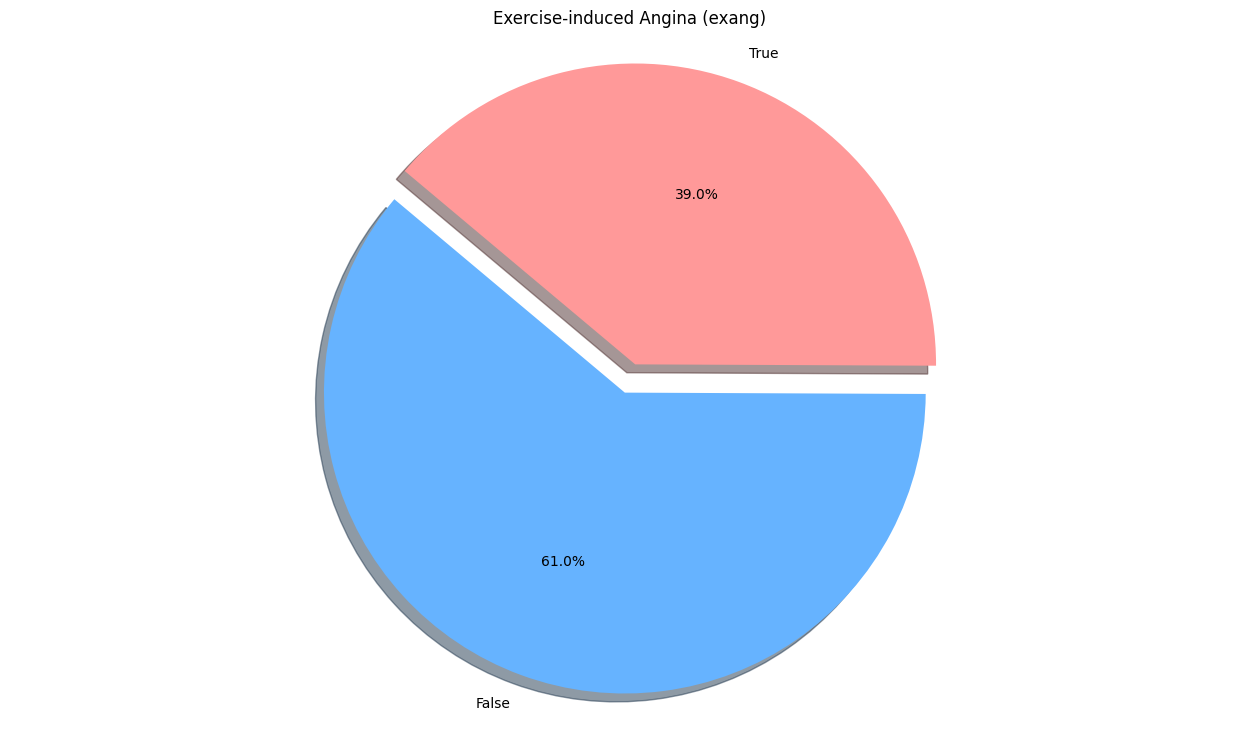

In [32]:
import matplotlib.pyplot as plt
# Data
labels = ['False', 'True']
sizes = [528, 337]
colors = ['#66b3ff', '#ff9999']  # Awesome colors
explode = (0, 0.1)  # Slightly explode the 'True' slice for emphasis
# Create a pie chart
plt.figure(figsize=(16, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
# Title
plt.title('Exercise-induced Angina (exang)')
# Show the plot
plt.show()

Exploring oldpeak ST depression induced by exercise relative to rest

In [33]:
data["oldpeak"].value_counts()

,count
oldpeak,
0.0,370
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
0.8,15


In [35]:
data["oldpeak"].describe()

,oldpeak
count,858.000000
mean,0.878788
std,1.091226
min,-2.600000
25%,0.000000
50%,0.500000
75%,1.500000
max,6.200000


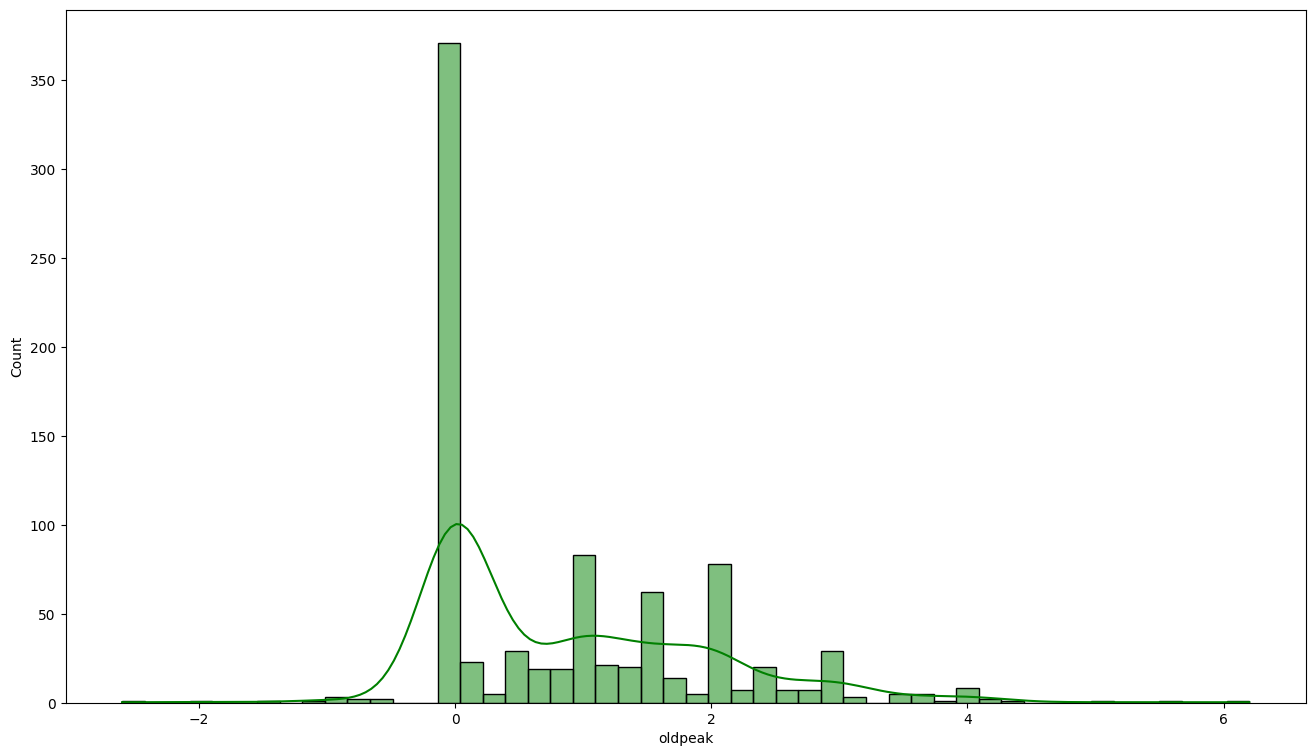

In [34]:
plt.figure(figsize=(16, 9))

# Create a histplot of the thalch column with a KDE overlay
sns.histplot(data=data, x="oldpeak", kde=True, bins=50, color='g')
# Display the plot
plt.show()

Exploring slope The slope of the peak exercise ST segment

In [36]:
data["slope"].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


Let's Visualize slope

In [37]:
import plotly.graph_objects as go
# Data
slope_data = {
    "flat": 345,
    "upsloping": 203,
    "downsloping": 63
}

fig = go.Figure()

# Add a scatter plot (line plot)
fig.add_trace(go.Scatter(x=list(slope_data.keys()), y=list(slope_data.values()), mode='lines+markers', name='Slope'))
# Customize the plot
fig.update_layout(
    title="Slope of the Peak Exercise ST Segment",
    xaxis_title="Slope Type",
    yaxis_title="Count",
    showlegend=True
)
fig.show()

Exploring ca Number of major vessels (0-3) colored by fluoroscopy

In [38]:
data["ca"].value_counts()

,count
ca,
0.0,181
1.0,67
2.0,41
3.0,20


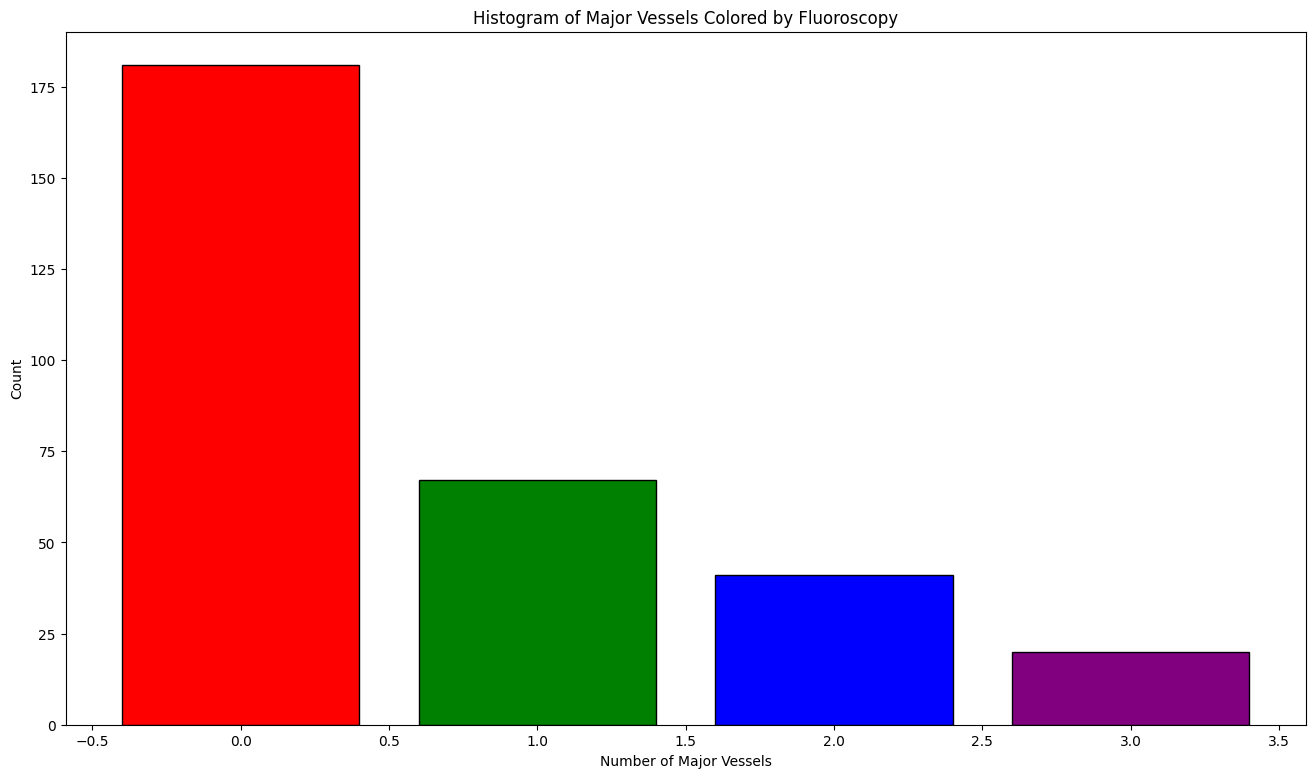

In [39]:
import matplotlib.pyplot as plt

# Data
categories = [0.0, 1.0, 2.0, 3.0]
counts = [181, 67, 41, 20]
colors = ['red', 'green', 'blue', 'purple']
plt.figure(figsize=(16, 9))
plt.bar(categories, counts, color=colors, edgecolor="black")
# Labels and title
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.title("Histogram of Major Vessels Colored by Fluoroscopy")

# Show the plot
plt.show()

Exploring thal Thalassemia (Values: normal, fixed defect, reversible defect)

In [40]:
data["thal"].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


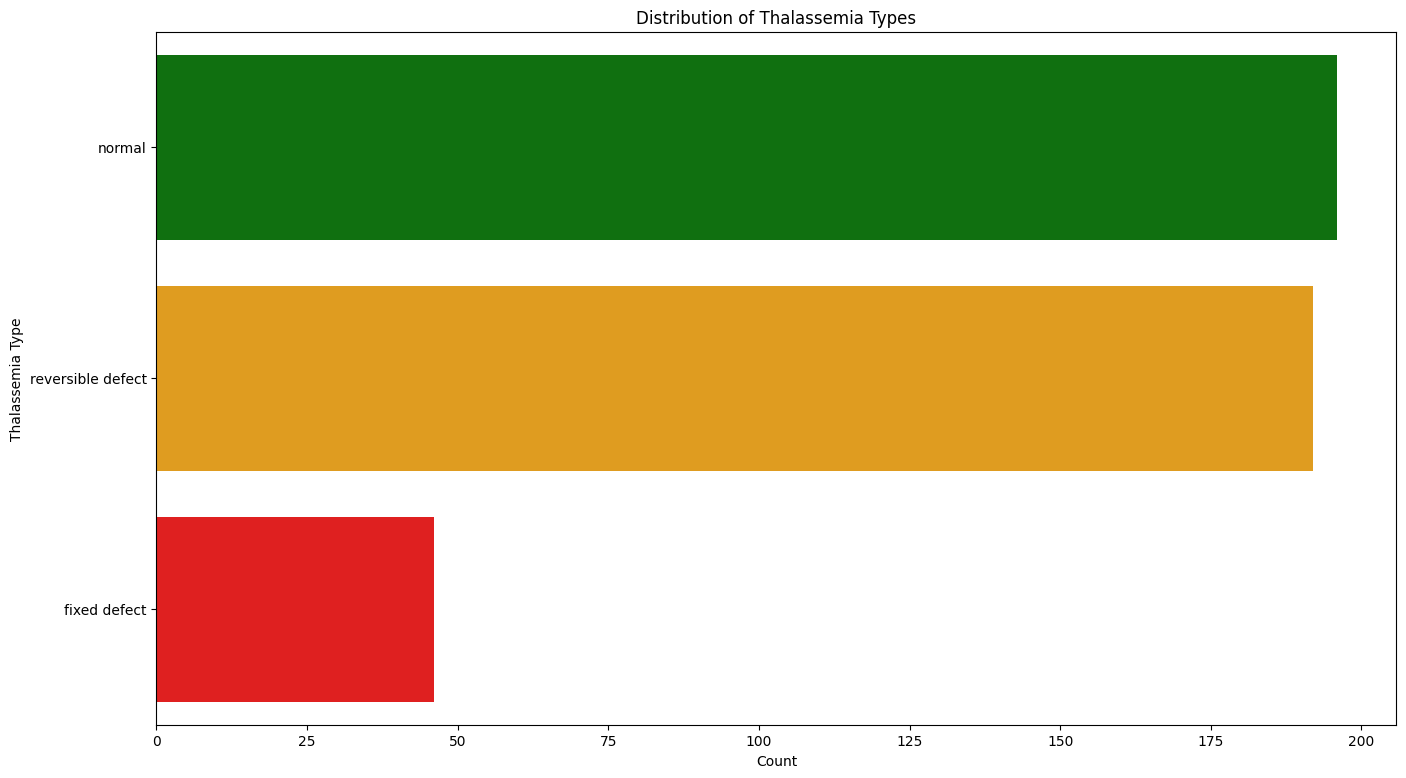

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
thal_values = ['normal'] * 196 + ['reversible defect'] * 192 + ['fixed defect'] * 46
# Plot
plt.figure(figsize=(16, 9))
sns.countplot(y=thal_values, palette=['green', 'orange', 'red'])
plt.xlabel('Count')
plt.ylabel('Thalassemia Type')
plt.title('Distribution of Thalassemia Types')
plt.show()

Exploring num The predicted attribute, target [0=no heart disease; 1,2,3,4 = stages of heart disease ])

In [42]:
data["num"].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


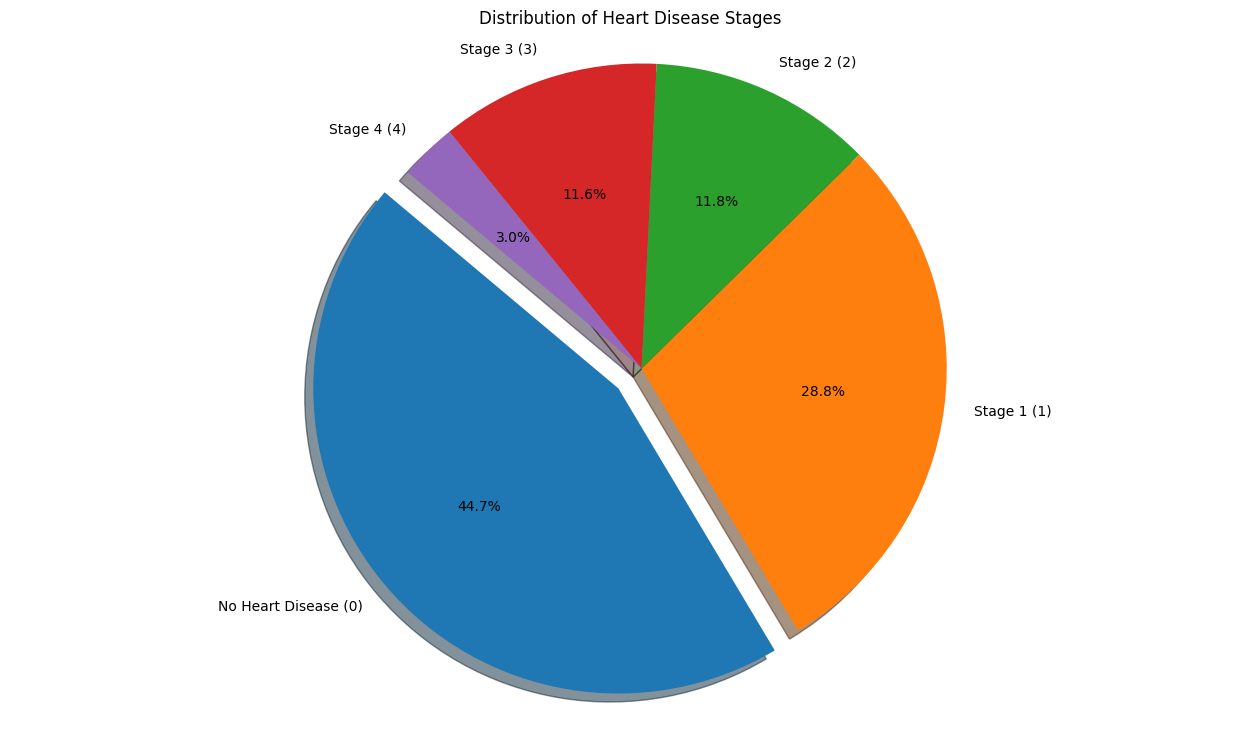

In [43]:
# Data
labels = ['No Heart Disease (0)', 'Stage 1 (1)', 'Stage 2 (2)', 'Stage 3 (3)', 'Stage 4 (4)']
sizes = [411, 265, 109, 107, 28]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
explode = (0.1, 0, 0, 0, 0)
# Plot
plt.figure(figsize=(16, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Heart Disease Stages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Dealing with Missing Values in Dataset

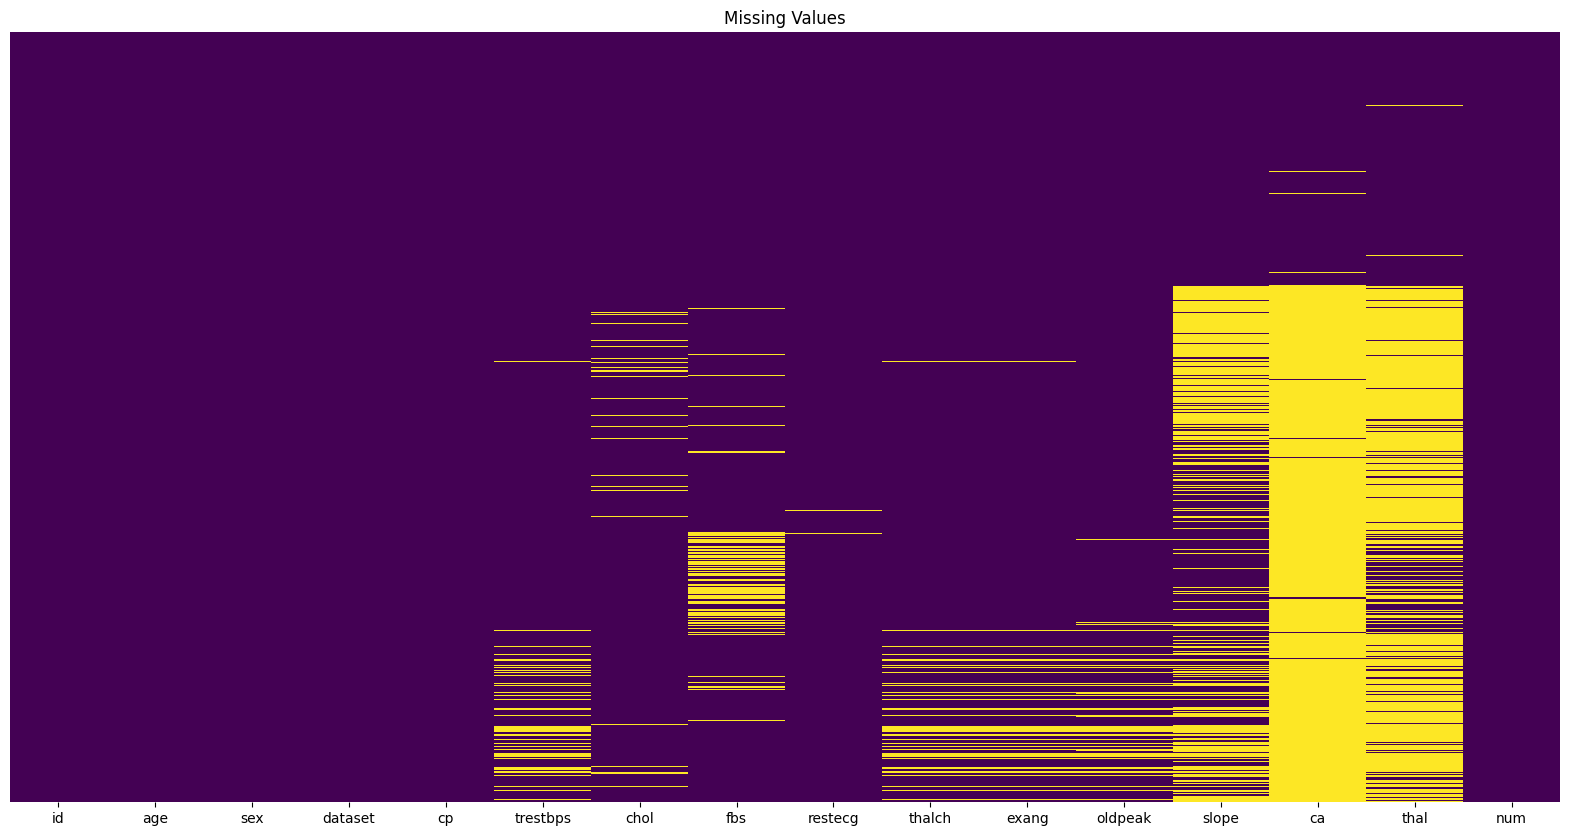

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

In [45]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Convert column with missing values into a list

In [46]:
missing_data_cols = data.isnull().sum()[data.isnull().sum() > 0].index.to_list()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

Seperating columns based upon their data types

In [47]:
categorical_cols = ["thal","ca","exang","slope","restecg","fbs","cp","sex","num"]
bool_cols = ["fbs","exang"]
numeric_cols = ["oldpeak","thalch","chol","trestbps","age"]

In [48]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def impute_categorical_missing_data(passed_col):
    data_null = data[data[passed_col].isnull()]
    data_not_null = data[data[passed_col].notnull()]

    X = data_not_null.drop(passed_col, axis=1)
    y = data_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype.name == 'category':
            X[col] = label_encoder.fit_transform(X[col].astype(str))

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y.astype(str))

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            X[col] = iterative_imputer.fit_transform(X[[col]])[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f"The feature '{passed_col}' has been imputed with {round(acc_score * 100, 2)}% accuracy\n")

    X = data_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype.name == 'category':
            X[col] = label_encoder.fit_transform(X[col].astype(str))
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            X[col] = iterative_imputer.fit_transform(X[[col]])[:, 0]

    if len(data_null) > 0:
        data_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            data_null[passed_col] = data_null[passed_col].map({0: False, 1: True})

    data = pd.concat([data_not_null, data_null])
    return data[passed_col]

Let's Check Missing Values Again

In [49]:
data.isnull().sum().sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


**Let's check missing values again**

In [54]:
data.isnull().sum().sort_values(ascending=False)


,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
thalch,55
exang,55
restecg,2
chol,0
trestbps,0


Create box plots for all numeric columns using for loop and subplot

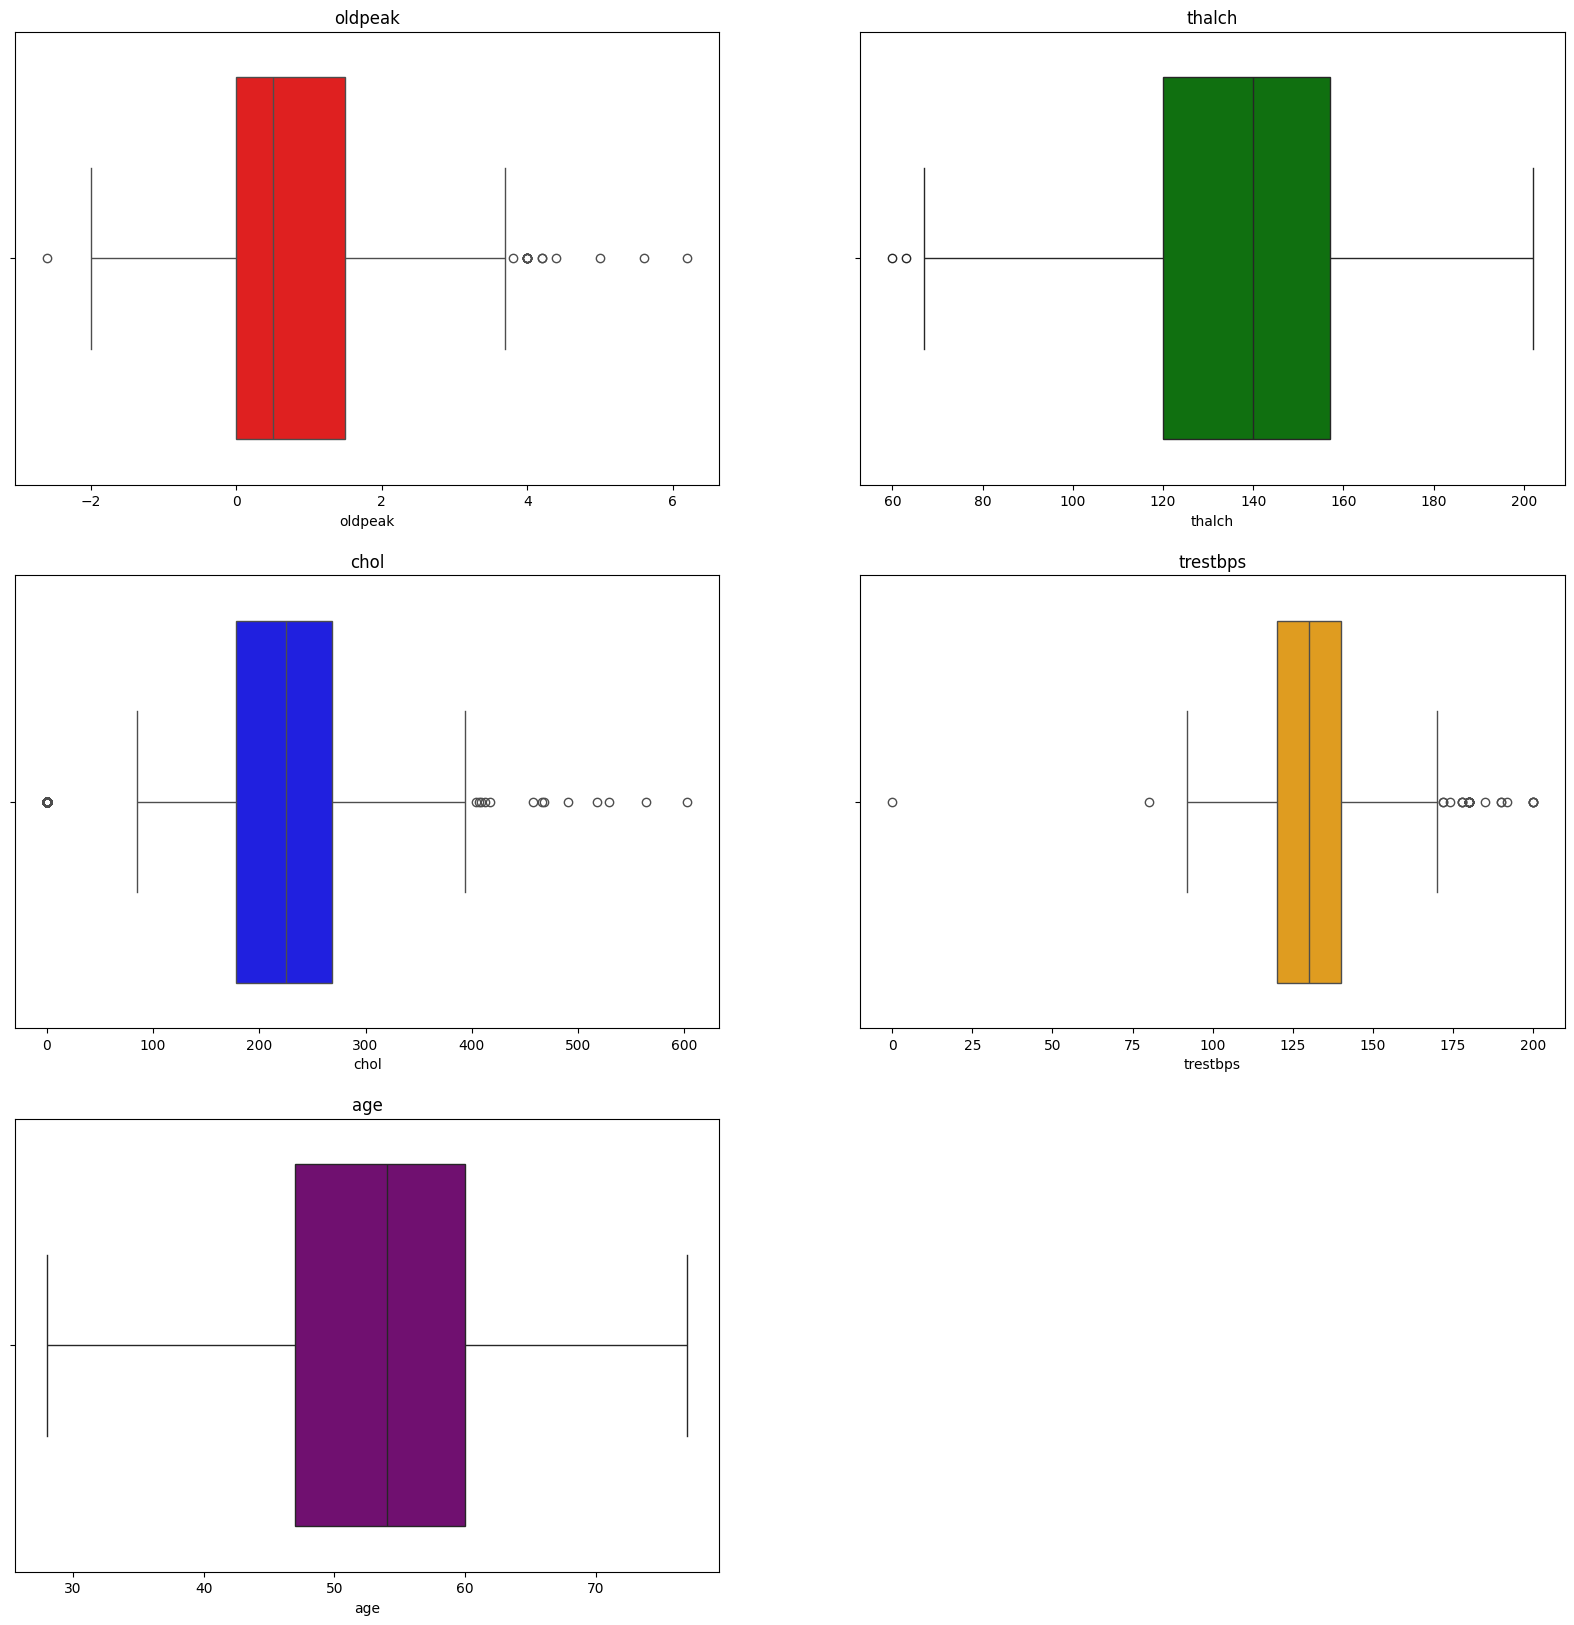

In [55]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[col], color=colors[i])
    plt.title(col)
plt.show()


Remove row where trestbps is 0

In [58]:
# print the row from df where trestbps value is 0
data[data['trestbps'] == 0]
# remove this row from data
df = data[data['trestbps'] != 0]

1. Chi-Square Test (Categorical Features):
*  Use for categorical variables like sex, cp, fbs, restecg, exang, slope, thal, ca.
* This test evaluates if there’s a
 significant association between categorical variables and the target.
  



In [59]:
dataset = data.copy()

In [60]:
categorical_columns_for_chi_squared_test = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']


In [65]:
# Label encode each categorical column
label_enc = LabelEncoder()
for col in categorical_columns_for_chi_squared_test:
    dataset[col] = label_enc.fit_transform(dataset[col])


In [66]:
# Define X1 (independent variables) and y1 (target)
X1 = dataset[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']]
y1 = dataset['num']

2. ANOVA F-test (Numerical Features):


In [76]:
# 2. ANOVA F-test (Numerical Features):

X_num_for_f_test = dataset[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

y_for_f_test = dataset['num']

# Handle missing values in X_num_for_f_test using IterativeImputer
from sklearn.impute import IterativeImputer
# Instantiate the imputer
imputer = IterativeImputer(random_state=42)
# Fit and transform the data
X_num_for_f_test_imputed = imputer.fit_transform(X_num_for_f_test)

# Calculate the f-scores and p-values for the numerical features
# Use the imputed data
f_scores, p_values = f_classif(X_num_for_f_test_imputed, y_for_f_test)

# Create a DataFrame to display the F-scores
f_scores_data = pd.DataFrame({'Feature': X_num_for_f_test.columns, 'F-Score': f_scores})

In [78]:
print(f_scores_data.sort_values(by='F-Score', ascending=False))

    Feature    F-Score
4   oldpeak  54.010822
3    thalch  43.760108
0       age  31.226059
2      chol  18.201842
1  trestbps   3.901205


Machine Learning on this Dataset


In [79]:
# let's take a look at names of the columns in this dataset again
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [80]:
# List of final features to keep
final_features = ['ca', 'cp', 'exang', 'slope', 'thal', 'oldpeak', 'thalch', 'age', 'chol', 'trestbps']

In [81]:
# Selecting only the final set of features along with the target column 'num'
final_dataset = dataset[final_features + ['num']]

In [82]:
# Display the first few rows of the updated dataset
final_dataset.head()

,ca,cp,exang,slope,thal,oldpeak,thalch,age,chol,trestbps,num
0,0.0,3,0,0,0,2.3,150.0,63,233.0,145.0,0
1,3.0,0,1,1,1,1.5,108.0,67,286.0,160.0,2
2,2.0,0,1,1,2,2.6,129.0,67,229.0,120.0,1
3,0.0,2,0,0,1,3.5,187.0,37,250.0,130.0,0
4,0.0,1,0,2,1,1.4,172.0,41,204.0,130.0,0


In [83]:
final_dataset = data

Target Column


In [84]:
# let's take a look at num column
data["num"].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


Split data into X and y


In [85]:
# split data into X and y
X = df.drop(['num'], axis=1)
y = df["num"]

Encode all catagorical columns using seperete label encoder for each and save it for inverse transform


In [93]:
# Encode all catagorical columns using seperete label encoder for each and save it for inverse transform
le = LabelEncoder()
# using for loop
for cols in X.columns:
# Task: Separate Encoder for all cat and object columns and inverse transform at the end
        label_encoder = LabelEncoder()
        for col in X.columns:
          if X[col].dtype == 'object' or X[col].dtype == 'category':
           X[col] = label_encoder.fit_transform(X[col])
        else:
            pass
            X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



Importing Machine Learning Libraries


In [114]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Let's Select the best model for prediction


In [99]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]
best_model = None
best_accuracy = 0.0

In [125]:
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])



In [127]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ...
]


In [128]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Assuming models is defined like this:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(random_state=42))
]

# Best model tracking
best_model = None
best_accuracy = 0.0

# Iterate over models and evaluate using cross-validation
for name, model in models:
    # Create a pipeline with imputation and model
    pipeline = Pipeline([
        ('imputer', IterativeImputer(estimator=RandomForestRegressor(random_state=42), max_iter=10, random_state=0)),
        ('model', model)
    ])

    # Evaluate the model with cross-validation
    scores = cross_val_score(pipeline, X, y, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Print model performance
    print(f"{name}: Mean Accuracy = {mean_accuracy:.4f}")

    # Update best model if this one is better
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = pipeline

# Final output
if best_model:
    print(f"\nBest Model: {best_model.named_steps['model'].__class__.__name__} with Mean Accuracy = {best_accuracy:.4f}")


Logistic Regression: Mean Accuracy = 0.4927
Random Forest: Mean Accuracy = 0.4654

Best Model: LogisticRegression with Mean Accuracy = 0.4927


In [136]:
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))
